# Jaccard kNN denoising

Cleaning the kNN graph by reweighting it with Jaccard indices, as proposed in [1] and [2].

[1] Duren, Zhana, et al. "Regulatory analysis of single cell multiome gene expression and chromatin accessibility data with scREG." Genome biology 23.1 (2022): 1-19.<br>
[2]  Levine, Jacob H., et al. "Data-driven phenotypic dissection of AML reveals progenitor-like cells that correlate with prognosis." Cell 162.1 (2015): 184-197.

In [123]:
# Imports.
import scanpy as sc
import numpy as np

In [124]:
# Loading preprocessed data.
adata = sc.datasets.pbmc3k_processed()

In [125]:
# Compute the kNN based on the Euclidean distance on PCA components.
sc.pp.neighbors(adata)

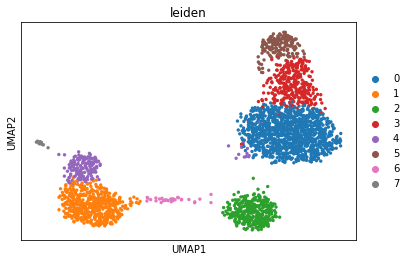

In [126]:
# Compute the UMAP projection and Leiden clustering.
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden')

In [127]:
# Define the Jaccard index.
def jaccard(a, b):
    inter = len(np.intersect1d(a, b))
    return inter / (len(a) + len(b) - inter)

In [128]:
# Function reweighting Scanpy's kNN based on the Jaccard index.
def jaccard_denoising(adata):

    # Iterate over all cells.
    for i in range(adata.n_obs):

        # Get nearest neighbors of cell i.
        _, idx_i = adata.obsp['distances'][i].nonzero()

        # Iterate over the nearest neighbors.
        for j in idx_i:

            # Get the nearest neighbors of cell j.
            _, idx_j = adata.obsp['distances'][j].nonzero()

            # Compute the Jaccard index.
            d = jaccard(idx_i, idx_j)

            # Reweight the kNN.
            adata.obsp['connectivities'][i, j] = d
            adata.obsp['connectivities'][j, i] = d

In [129]:
# Perform the Jaccard denoising.
jaccard_denoising(adata)

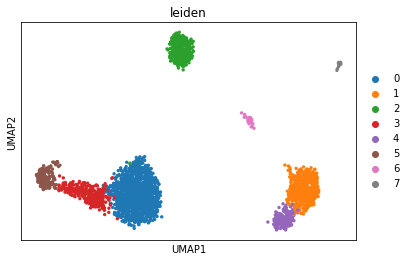

In [130]:
# Compute the new UMAP and Leiden clustering.
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden')